In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:\\Users\\jayes\\Downloads")

In [3]:
df = pd.read_csv("Raleigh_Police_Incidents_(NIBRS).csv")
#df['latitude'] = (round(df['latitude'], 2))
#df['longitude'] = (round(df['longitude'], 2))
df= df[df['latitude'] != 0]
df= df[df['longitude'] != 0]
df['longitude'] = round(df['longitude'], 4)
df['latitude'] = round(df['latitude'], 4)
zipcodes = pd.read_csv("zipcodes.csv")
zipcodes = zipcodes[zipcodes['LAT'] > 35.5]  
zipcodes = zipcodes[zipcodes['LAT'] < 36.005]  
#zipcodes = zipcodes.sort_values(by=['LAT'])
zipcodes = zipcodes[zipcodes['LNG'] > -79]  
zipcodes = zipcodes[zipcodes['LNG'] < -78.3] 
zipcodes= zipcodes[zipcodes['LAT'] != 0]
zipcodes= zipcodes[zipcodes['LNG'] != 0]

In [4]:
zipcodes

,ZIP,LAT,LNG
8474,27502,35.7153,-78.9210
8482,27511,35.7634,-78.7885
8483,27513,35.8021,-78.8027
8487,27518,35.7311,-78.7732
8488,27519,35.8086,-78.8833
8489,27520,35.6197,-78.4770
8492,27523,35.7736,-78.9569
8495,27526,35.5440,-78.8298
8496,27527,35.6539,-78.3817
8497,27529,35.6556,-78.5849


In [5]:
print(max(df['longitude']))

-78.325


In [6]:
print(max(zipcodes['LNG']))

-78.3027


In [7]:
len(pd.unique(zipcodes['LAT'])) - len(pd.unique(zipcodes['LNG']))

-1

In [8]:
df['crime_description'].value_counts()

Assault/Simple                                        27385
Larceny/Theft from Motor Vehicle                      18234
All Other/Damage to Property (minor)                  17625
Larceny/All Other                                     17238
Drug Violation/Misdemeanor                            15674
                                                      ...  
WEAPONS/ALL OTHER                                         1
EMBEZZLEMENT/ALL OTHER(LARCENY FROM EMPLOYER)             1
DRUGS/POSSESSION/OTHER DANGEROUS NONNARCOTIC DRUGS        1
FRAUD/WORTHLESS CHECK                                     1
Gambling/Sports Tampering                                 1
Name: crime_description, Length: 105, dtype: int64

In [9]:
df['latitude'].value_counts()

35.7986    1845
35.9096    1802
35.7798    1402
35.8366    1331
35.8708    1104
           ... 
35.7227       1
35.9685       1
35.9524       1
35.5667       1
35.7025       1
Name: latitude, Length: 2534, dtype: int64

In [10]:
pd.unique(df['latitude'])

array([35.7785, 35.8555, 35.8697, ..., 35.9575, 35.7162, 35.9683])

In [11]:
df_2 = df.groupby(["latitude", "longitude"]).size().to_frame().reset_index()
df_2["zips"] = 0
df_2

,latitude,longitude,0,zips
0,35.5667,-78.8116,1,0
1,35.5809,-78.6308,1,0
2,35.5924,-78.7825,1,0
3,35.6052,-78.7479,1,0
4,35.6071,-78.7460,3,0
...,...,...,...,...
51121,35.9761,-78.5048,1,0
51122,35.9855,-78.6230,1,0
51123,35.9912,-78.5181,1,0
51124,36.0048,-78.5212,1,0


In [12]:
lang_unique = pd.unique(zipcodes['LAT'])
lon_unique = pd.unique(zipcodes['LNG'])

In [13]:
df_2['latitude'].iloc[0]

35.5667

In [14]:
"""
def get_zip(df, lon_field, lat_field):
    location = reverse_geocode((Geometry({"x":float(df[lon_field]), "y":float(df[lat_field]), "spatialReference":{"wkid": 4326}})))
    return location['address']['Postal']



geolocator = geopy.Nominatim(user_agent='my-application')
"""

'\ndef get_zip(df, lon_field, lat_field):\n    location = reverse_geocode((Geometry({"x":float(df[lon_field]), "y":float(df[lat_field]), "spatialReference":{"wkid": 4326}})))\n    return location[\'address\'][\'Postal\']\n\n\n\ngeolocator = geopy.Nominatim(user_agent=\'my-application\')\n'

In [15]:
def closest(lst, K): 
      
     lst = np.asarray(lst) 
     idx = (np.abs(lst - K)).argmin() 
     return lst[idx] 

In [16]:
closest(zipcodes['LAT'], df_2['latitude'].iloc[0])

35.5574

In [17]:
"""
for i in range(len(df_2)): 
    closest_lat = closest(zipcodes['LAT'], df_2['latitude'].iloc[i])
    closest_lng = closest(zipcodes['LNG'], df_2['longitude'].iloc[i])
    #print(closest_lat)
    for j in range(len(zipcodes)):
        if(zipcodes['LAT'].iloc[j] == closest_lat or zipcodes['LNG'].iloc[j] == closest_lng):
            df_2['zips'].iloc[i] = zipcodes['ZIP'].iloc[j]
        """

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
#df_2.to_csv("df_2.csv")
df_2 = pd.read_csv("df_2.csv")

In [19]:
df_2 = df_2.sort_values(by=[0], ascending = False)
df_2

,latitude,longitude,0,zips
48450,35.9096,-78.7775,1772,27617
22393,35.7986,-78.5621,1432,27604
30927,35.8366,-78.6121,1076,27614
39753,35.8708,-78.5651,970,27616
39446,35.8696,-78.5756,892,27616
...,...,...,...,...
25422,35.8105,-78.5481,1,27610
25421,35.8105,-78.5684,1,27608
25420,35.8105,-78.5689,1,27608
25417,35.8105,-78.5725,1,27608


In [20]:
pd.unique(df_2['zips'])

array([27617, 27604, 27614, 27616, 27529, 27605, 27615, 27610, 27607,
       27597, 27608, 27560, 27612, 27609, 27713, 27613, 27591, 27606,
       27603, 27571, 27545, 27592, 27601, 27587, 27709, 27703, 27707,
       27701, 27539, 27518, 27562, 27520, 27540, 27511, 27513, 27596],
      dtype=int64)

In [21]:
df

,X,Y,OBJECTID,GlobalID,case_number,crime_category,crime_code,crime_description,crime_type,reported_block_address,...,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date
230,-78.613348,35.778483,12266,aeb7c4c5-3971-4b42-853b-b74c494ac456,P15056938,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,200 BLOCK LIGHTNER LN,...,2015/10/14 05:08:00+00,2015,10,14,1,Wednesday,35.7785,-78.6133,RPD,2017/01/26 20:52:06.377+00
270,-78.713100,35.855529,12313,dc48193b-2cf7-4a77-851d-52542e1921ba,P17032009,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,5600 BLOCK BRIER OAKS LANE,...,2017/06/13 19:21:00+00,2017,6,13,15,Tuesday,35.8555,-78.7131,RPD,2017/06/23 13:08:37.569+00
342,-78.577395,35.869659,12407,8c2cc587-d8a1-4da5-b25b-d82ce62dda38,P17023148,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,7300 BLOCK OLD WAKE FOREST RD,...,2017/05/01 23:01:00+00,2017,5,1,19,Monday,35.8697,-78.5774,RPD,2017/07/01 01:00:39.567+00
390,-78.581056,35.810131,12465,4bd55ec1-876c-44e7-b9ca-7478b7a56749,P14108837,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,3400 BLOCK DOGWOOD DR,...,2014/12/07 03:01:00+00,2014,12,6,22,Saturday,35.8101,-78.5811,RPD,2014/12/12 19:11:08.227+00
631,-78.700296,35.878468,12760,16e9f210-abb9-4ec6-8a46-86990cf902f2,P14112653,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,4300 BLOCK SNIPE CREEK LN,...,2014/12/26 02:02:00+00,2014,12,25,21,Thursday,35.8785,-78.7003,RPD,2016/02/02 17:55:14.617+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337734,-78.629922,35.879621,619049,4b852384-06ea-42c6-a998-d9044f7bb50e,P21013059,VANDALISM,80B,All Other/Damage to Property (minor),NaN,1100 BLOCK NEWTON RD,...,2021/03/19 05:23:00+00,2021,3,19,1,Friday,35.8796,-78.6299,RPD,2021/03/19 07:46:10.087+00
337735,-78.610948,35.755015,619050,af88f734-c1c4-4c20-bf5a-2a3914cbf7c4,P21013061,LARCENY FROM MV,35F,Larceny/Theft from Motor Vehicle,CRIMES AGAINST PROPERTY,1800 BLOCK LIBERTY PL,...,2021/03/19 07:07:00+00,2021,3,19,3,Friday,35.7550,-78.6109,RPD,2021/03/19 08:51:57.357+00
337736,-78.713167,35.834062,619051,a2cfef80-a597-46f0-92d8-bb00d32c6e08,P21013062,ASSAULT,25E,Assault/Simple,CRIMES AGAINST PERSONS,4000 BLOCK GRAND MANOR CT,...,2021/03/19 07:04:00+00,2021,3,19,3,Friday,35.8341,-78.7132,RPD,2021/03/19 08:54:26.310+00
337777,-78.578986,35.933289,619092,7d469d2e-903c-4d45-8487-e695908d80df,P21013020,DRUG VIOLATIONS,54Z,Drug Equipment/Paraphernalia,CRIMES AGAINST SOCIETY,12000 BLOCK FALLS OF NEUSE RD,...,2021/03/19 02:43:00+00,2021,3,18,22,Thursday,35.9333,-78.5790,RPD,2021/03/19 06:52:07.943+00


In [22]:
df_with_zipcode = pd.merge(df, df_2,  how='left', left_on=['latitude','longitude'], right_on = ['latitude','longitude'])
df_with_zipcode

,X,Y,OBJECTID,GlobalID,case_number,crime_category,crime_code,crime_description,crime_type,reported_block_address,...,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date,0,zips
0,-78.613348,35.778483,12266,aeb7c4c5-3971-4b42-853b-b74c494ac456,P15056938,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,200 BLOCK LIGHTNER LN,...,10,14,1,Wednesday,35.7785,-78.6133,RPD,2017/01/26 20:52:06.377+00,23,27614
1,-78.713100,35.855529,12313,dc48193b-2cf7-4a77-851d-52542e1921ba,P17032009,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,5600 BLOCK BRIER OAKS LANE,...,6,13,15,Tuesday,35.8555,-78.7131,RPD,2017/06/23 13:08:37.569+00,8,27613
2,-78.577395,35.869659,12407,8c2cc587-d8a1-4da5-b25b-d82ce62dda38,P17023148,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,7300 BLOCK OLD WAKE FOREST RD,...,5,1,19,Monday,35.8697,-78.5774,RPD,2017/07/01 01:00:39.567+00,99,27616
3,-78.581056,35.810131,12465,4bd55ec1-876c-44e7-b9ca-7478b7a56749,P14108837,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,3400 BLOCK DOGWOOD DR,...,12,6,22,Saturday,35.8101,-78.5811,RPD,2014/12/12 19:11:08.227+00,3,27608
4,-78.700296,35.878468,12760,16e9f210-abb9-4ec6-8a46-86990cf902f2,P14112653,SEX OFFENSES,17N,Sex Offense/Peeping Tom,NaN,4300 BLOCK SNIPE CREEK LN,...,12,25,21,Thursday,35.8785,-78.7003,RPD,2016/02/02 17:55:14.617+00,24,27616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251531,-78.629922,35.879621,619049,4b852384-06ea-42c6-a998-d9044f7bb50e,P21013059,VANDALISM,80B,All Other/Damage to Property (minor),NaN,1100 BLOCK NEWTON RD,...,3,19,1,Friday,35.8796,-78.6299,RPD,2021/03/19 07:46:10.087+00,2,27616
251532,-78.610948,35.755015,619050,af88f734-c1c4-4c20-bf5a-2a3914cbf7c4,P21013061,LARCENY FROM MV,35F,Larceny/Theft from Motor Vehicle,CRIMES AGAINST PROPERTY,1800 BLOCK LIBERTY PL,...,3,19,3,Friday,35.7550,-78.6109,RPD,2021/03/19 08:51:57.357+00,1,27614
251533,-78.713167,35.834062,619051,a2cfef80-a597-46f0-92d8-bb00d32c6e08,P21013062,ASSAULT,25E,Assault/Simple,CRIMES AGAINST PERSONS,4000 BLOCK GRAND MANOR CT,...,3,19,3,Friday,35.8341,-78.7132,RPD,2021/03/19 08:54:26.310+00,9,27613
251534,-78.578986,35.933289,619092,7d469d2e-903c-4d45-8487-e695908d80df,P21013020,DRUG VIOLATIONS,54Z,Drug Equipment/Paraphernalia,CRIMES AGAINST SOCIETY,12000 BLOCK FALLS OF NEUSE RD,...,3,18,22,Thursday,35.9333,-78.5790,RPD,2021/03/19 06:52:07.943+00,2,27613


In [23]:
crime_per_zipcode = df_with_zipcode[['crime_category', 'crime_description', 'zips']] 
crime_per_zipcode = crime_per_zipcode.sort_values(by=['zips'])
crime_per_zipcode

,crime_category,crime_description,zips
194599,DRUGS,Drug Violation/Felony,27511
200629,DRUGS,Drug Violation/Felony,27513
124027,FRAUD,Fraud/False Pretense or Swindle,27518
124026,LARCENY,Larceny/All Other,27518
156510,TRAFFIC,Traffic/DWI (Driving While Impaired),27520
...,...,...,...
87877,FRAUD,Fraud/ID Theft,27713
188272,DRUGS,Drug Violation/Misdemeanor,27713
87872,ALL OTHER OFFENSES,All Other/Trespassing,27713
123185,TRAFFIC,Traffic/DWI (Driving While Impaired),27713


In [24]:
crime_per_zipcode['zips'].value_counts()

27614    40429
27616    27524
27609    20318
27612    19894
27615    17221
27608    16076
27604    14432
27610    13960
27607    11158
27605    11134
27713    10961
27597     8177
27529     7341
27617     7154
27601     4604
27606     4071
27592     3228
27613     2632
27603     2080
27587     2033
27560     1822
27571     1469
27591     1417
27703      850
27545      639
27709      487
27707      404
27701        6
27562        4
27539        3
27518        2
27520        2
27513        1
27596        1
27540        1
27511        1
Name: zips, dtype: int64

need ot remove all zipcodes with few reported crimes so removing 27701, 27562, 27539, 27518, 27520, 27513, 27596, 27540, 27511

In [25]:
a = [27701, 27562, 27539, 27518, 27520, 27513, 27596, 27540, 27511]
crime_per_zipcode = crime_per_zipcode[~crime_per_zipcode['zips'].isin(a)]
crime_per_zipcode

,crime_category,crime_description,zips
177653,DRUGS,Drug Violation/Misdemeanor,27529
6885,ASSAULT,Assault/Simple,27529
137493,ASSAULT,Assault/Simple,27529
137492,LARCENY,Larceny/All Other,27529
102748,DRUG VIOLATIONS,Drug Equipment/Paraphernalia,27529
...,...,...,...
87877,FRAUD,Fraud/ID Theft,27713
188272,DRUGS,Drug Violation/Misdemeanor,27713
87872,ALL OTHER OFFENSES,All Other/Trespassing,27713
123185,TRAFFIC,Traffic/DWI (Driving While Impaired),27713


In [26]:
crime_per_zipcode['zips'].value_counts()

27614    40429
27616    27524
27609    20318
27612    19894
27615    17221
27608    16076
27604    14432
27610    13960
27607    11158
27605    11134
27713    10961
27597     8177
27529     7341
27617     7154
27601     4604
27606     4071
27592     3228
27613     2632
27603     2080
27587     2033
27560     1822
27571     1469
27591     1417
27703      850
27545      639
27709      487
27707      404
Name: zips, dtype: int64

In [27]:
crime_per_zipcode_count = crime_per_zipcode.groupby(['zips','crime_category']).size().to_frame().reset_index()
crime_per_zipcode_count

,zips,crime_category,0
0,27529,ALL OTHER OFFENSES,471
1,27529,ARSON,13
2,27529,ASSAULT,1448
3,27529,BURGLARY/COMMERCIAL,147
4,27529,BURGLARY/RESIDENTIAL,217
...,...,...,...
722,27713,STOLEN PROPERTY,85
723,27713,TRAFFIC,334
724,27713,UNAUTHORIZED MOTOR VEHICLE USE,81
725,27713,VANDALISM,1041


In [28]:
list_crimes = pd.unique(crime_per_zipcode_count['crime_category'])
list_crimes = sorted(list_crimes)
list_crimes

['ALL OTHER OFFENSES',
 'ARSON',
 'ASSAULT',
 'BRIBERY',
 'BURGLARY/COMMERCIAL',
 'BURGLARY/RESIDENTIAL',
 'DISORDERLY CONDUCT',
 'DRUG VIOLATIONS',
 'DRUGS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FRAUD',
 'GAMBLING',
 'HUMAN TRAFFICKING',
 'HUMANE',
 'KIDNAPPING',
 'LARCENY',
 'LARCENY FROM MV',
 'LIQUOR LAW VIOLATIONS',
 'MISCELLANEOUS',
 'MURDER',
 'MV THEFT',
 'OBSCENE MATERIAL',
 'PROSTITUTION',
 'ROBBERY',
 'SEX OFFENSES',
 'STOLEN PROPERTY',
 'TRAFFIC',
 'UNAUTHORIZED MOTOR VEHICLE USE',
 'VANDALISM',
 'WEAPONS VIOLATION']

In [29]:
crime_per_zipcode_count.to_csv("crime_per_zipcode_count.csv")

In [30]:
#crime_per_zipcode_count_2 = crime_per_zipcode.pivot_table(index=['crime_category'], values=['zips'], aggfunc='count')
crime_per_zipcode_count_2 = pd.pivot_table(crime_per_zipcode,index=['zips'], columns=['crime_category'], aggfunc='count')
crime_per_zipcode_count_2 = crime_per_zipcode_count_2.fillna(0)
#crime_per_zipcode_count_2["sum"] = crime_per_zipcode_count_2.sum(axis=1)
crime_per_zipcode_count_2 = crime_per_zipcode_count_2.div(crime_per_zipcode_count_2.sum(axis=1), axis=0)
#crime_per_zipcode_count_2["sum"] = crime_per_zipcode_count_2.sum(axis=1)
crime_per_zipcode_count_2

crime_description                                \
crime_category ALL OTHER OFFENSES     ARSON   ASSAULT   BRIBERY   
zips                                                              
27529                    0.064160  0.001771  0.197248  0.000000   
27545                    0.081377  0.000000  0.262911  0.000000   
27560                    0.051043  0.001647  0.080132  0.000000   
27571                    0.054459  0.000000  0.147039  0.000000   
27587                    0.050664  0.000984  0.163305  0.000000   
27591                    0.057869  0.001411  0.271701  0.000000   
27592                    0.059789  0.000000  0.107497  0.000000   
27597                    0.064938  0.001712  0.144307  0.000000   
27601                    0.057124  0.000869  0.199392  0.000000   
27603                    0.074038  0.000000  0.127885  0.000000   
27604                    0.047464  0.001663  0.138581  0.000139   
27605                    0.062062  0.001437  0.149093  0.000000   
27606                    0.057725  0.001719  0.178826  0.000246   
27607                    0.064259  0.000807  0.170461  0.000000   
27608                    0.066497  0.000684  0.129385  0.000000   
27609                    0.060242  0.001329  0.166306  0.000000   
27610                    0.055014  0.001218  0.171060  0.000000   
27612                    0.057203  0.001005  0.156379  0.000000   
27613                    0.063450  0.001140  0.145517  0.000000   
27614                    0.061837  0.001707  0.175864  0.000025   
27615                    0.074444  0.001103  0.158992  0.000116   
27616                    0.053590  0.001344  0.145873  0.000000   
27617                    0.049623  0.000978  0.087643  0.000000   
27703                    0.080000  0.002353  0.177647  0.000000   
27707                    0.054455  0.000000  0.173267  0.000000   
27709                    0.096509  0.002053  0.147844  0.000000   
27713                    0.060487  0.002372  0.150534  0.000000   

                                                                            \
crime_category BURGLARY/COMMERCIAL BURGLARY/RESIDENTIAL DISORDERLY CONDUCT   
zips                                                                         
27529                     0.020025             0.029560           0.014167   
27545                     0.012520             0.042254           0.006260   
27560                     0.014270             0.010977           0.008782   
27571                     0.011572             0.046971           0.005446   
27587                     0.014757             0.083620           0.004919   
27591                     0.002823             0.044460           0.010586   
27592                     0.010843             0.045849           0.010223   
27597                     0.010395             0.036321           0.011496   
27601                     0.009774             0.059296           0.011946   
27603                     0.020673             0.036538           0.011538   
27604                     0.016491             0.035615           0.009424   
27605                     0.012844             0.040417           0.011945   
27606                     0.008597             0.070253           0.008352   
27607                     0.008066             0.048396           0.009410   
27608                     0.011135             0.015053           0.023264   
27609                     0.008859             0.046510           0.010434   
27610                     0.011676             0.060888           0.014183   
27612                     0.012164             0.049814           0.008797   
27613                     0.011018             0.035714           0.014058   
27614                     0.011452             0.040441           0.013777   
27615                     0.012194             0.018640           0.025666   
27616                     0.009519             0.044289           0.007557   
27617                     0.013978             0.018871

In [31]:
crime_per_zipcode_count_2.reset_index()
#print(np.array(crime_per_zipcode_count_2.columns))
crime_per_zipcode_count_2

crime_description                                \
crime_category ALL OTHER OFFENSES     ARSON   ASSAULT   BRIBERY   
zips                                                              
27529                    0.064160  0.001771  0.197248  0.000000   
27545                    0.081377  0.000000  0.262911  0.000000   
27560                    0.051043  0.001647  0.080132  0.000000   
27571                    0.054459  0.000000  0.147039  0.000000   
27587                    0.050664  0.000984  0.163305  0.000000   
27591                    0.057869  0.001411  0.271701  0.000000   
27592                    0.059789  0.000000  0.107497  0.000000   
27597                    0.064938  0.001712  0.144307  0.000000   
27601                    0.057124  0.000869  0.199392  0.000000   
27603                    0.074038  0.000000  0.127885  0.000000   
27604                    0.047464  0.001663  0.138581  0.000139   
27605                    0.062062  0.001437  0.149093  0.000000   
27606                    0.057725  0.001719  0.178826  0.000246   
27607                    0.064259  0.000807  0.170461  0.000000   
27608                    0.066497  0.000684  0.129385  0.000000   
27609                    0.060242  0.001329  0.166306  0.000000   
27610                    0.055014  0.001218  0.171060  0.000000   
27612                    0.057203  0.001005  0.156379  0.000000   
27613                    0.063450  0.001140  0.145517  0.000000   
27614                    0.061837  0.001707  0.175864  0.000025   
27615                    0.074444  0.001103  0.158992  0.000116   
27616                    0.053590  0.001344  0.145873  0.000000   
27617                    0.049623  0.000978  0.087643  0.000000   
27703                    0.080000  0.002353  0.177647  0.000000   
27707                    0.054455  0.000000  0.173267  0.000000   
27709                    0.096509  0.002053  0.147844  0.000000   
27713                    0.060487  0.002372  0.150534  0.000000   

                                                                            \
crime_category BURGLARY/COMMERCIAL BURGLARY/RESIDENTIAL DISORDERLY CONDUCT   
zips                                                                         
27529                     0.020025             0.029560           0.014167   
27545                     0.012520             0.042254           0.006260   
27560                     0.014270             0.010977           0.008782   
27571                     0.011572             0.046971           0.005446   
27587                     0.014757             0.083620           0.004919   
27591                     0.002823             0.044460           0.010586   
27592                     0.010843             0.045849           0.010223   
27597                     0.010395             0.036321           0.011496   
27601                     0.009774             0.059296           0.011946   
27603                     0.020673             0.036538           0.011538   
27604                     0.016491             0.035615           0.009424   
27605                     0.012844             0.040417           0.011945   
27606                     0.008597             0.070253           0.008352   
27607                     0.008066             0.048396           0.009410   
27608                     0.011135             0.015053           0.023264   
27609                     0.008859             0.046510           0.010434   
27610                     0.011676             0.060888           0.014183   
27612                     0.012164             0.049814           0.008797   
27613                     0.011018             0.035714           0.014058   
27614                     0.011452             0.040441           0.013777   
27615                     0.012194             0.018640           0.025666   
27616                     0.009519             0.044289           0.007557   
27617                     0.013978             0.018871

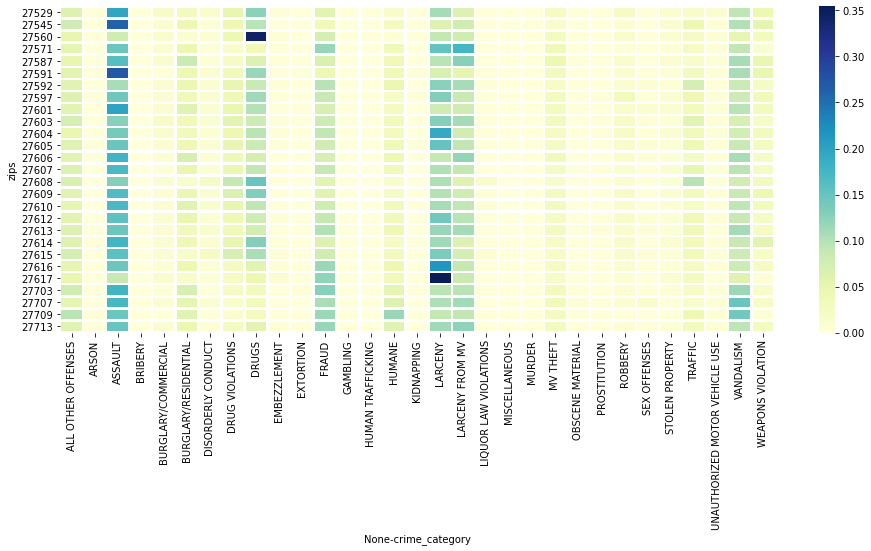

In [32]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(crime_per_zipcode_count_2, cmap="YlGnBu", xticklabels = list_crimes, linewidth = 1.5)
#g.set_xticklabels(labels = list_crimes, rotation=90)

In [33]:
crime_per_zipcode_count_2.to_csv("crime_per_zipcode_count_2.csv")

In [34]:
overall_biggest_crime_zipcode = crime_per_zipcode.groupby(['zips','crime_category']).size().to_frame().reset_index()
overall_biggest_crime_zipcode = overall_biggest_crime_zipcode.sort_values(by=['zips',0], ascending=False)
overall_biggest_crime_zipcode

,zips,crime_category,0
701,27713,ASSAULT,1650
714,27713,LARCENY FROM MV,1362
709,27713,FRAUD,1294
713,27713,LARCENY,1235
725,27713,VANDALISM,1041
...,...,...,...
18,27529,MURDER,10
12,27529,HUMAN TRAFFICKING,8
21,27529,PROSTITUTION,6
9,27529,EXTORTION,5


In [35]:
overall_biggest_crime_zipcode = overall_biggest_crime_zipcode.drop_duplicates(subset ="zips") 
overall_biggest_crime_zipcode

,zips,crime_category,0
701,27713,ASSAULT,1650
681,27709,ASSAULT,72
659,27707,ASSAULT,70
634,27703,ASSAULT,151
618,27617,LARCENY,2536
590,27616,LARCENY,5934
547,27615,ASSAULT,2738
516,27614,ASSAULT,7110
489,27613,ASSAULT,383
460,27612,ASSAULT,3111


In [36]:
overall_biggest_crime_zipcode.to_csv("overall_biggest_crime_zipcode.csv")

In [37]:
overall_crime_zipcode = crime_per_zipcode.groupby(['zips']).size().to_frame().reset_index()
overall_crime_zipcode = overall_crime_zipcode.sort_values(by=['zips'], ascending=False)
overall_crime_zipcode

,zips,0
26,27713,10961
25,27709,487
24,27707,404
23,27703,850
22,27617,7154
21,27616,27524
20,27615,17221
19,27614,40429
18,27613,2632
17,27612,19894


In [38]:
overall_crime_zipcode.to_csv("overall_crime_zipcode.csv")

In [42]:
from azureml.opendatasets import UsPopulationZip

population = UsPopulationZip()
population_df = population.to_pandas_dataframe()

ModuleNotFoundError: No module named 'azureml.opendatasets'

In [43]:
overall_crime_zipcode.sort_values(by=['zips'])

,zips,0
0,27529,7341
1,27545,639
2,27560,1822
3,27571,1469
4,27587,2033
5,27591,1417
6,27592,3228
7,27597,8177
8,27601,4604
9,27603,2080


In [75]:
income_zips = pd.read_csv("incomezip.csv")
income_zips

,Unnamed: 0,Group.1,zipcode,income,num individuals,NUMDEP,tax paid
0,1,27501,27501,83962.166667,2,1,828.333333
1,2,27502,27502,345752.000000,2,1,5503.833333
2,3,27503,27503,27178.000000,2,1,377.833333
3,4,27504,27504,65115.833333,2,1,558.666667
4,5,27505,27505,24029.333333,2,1,124.666667
...,...,...,...,...,...,...,...
77,78,27704,27704,122527.500000,2,1,1321.000000
78,79,27705,27705,317369.500000,2,0,4283.500000
79,80,27707,27707,287037.333333,2,1,3558.666667
80,81,27712,27712,149482.000000,2,1,2227.333333


In [76]:
(income_zips.columns)

Index(['Unnamed: 0', 'Group.1', 'zipcode', 'income', 'num individuals',
       'NUMDEP', 'tax paid'],
      dtype='object')

In [77]:
income_zips = income_zips.drop('Unnamed: 0', 1)
income_zips

,Group.1,zipcode,income,num individuals,NUMDEP,tax paid
0,27501,27501,83962.166667,2,1,828.333333
1,27502,27502,345752.000000,2,1,5503.833333
2,27503,27503,27178.000000,2,1,377.833333
3,27504,27504,65115.833333,2,1,558.666667
4,27505,27505,24029.333333,2,1,124.666667
...,...,...,...,...,...,...
77,27704,27704,122527.500000,2,1,1321.000000
78,27705,27705,317369.500000,2,0,4283.500000
79,27707,27707,287037.333333,2,1,3558.666667
80,27712,27712,149482.000000,2,1,2227.333333


In [78]:
crime_per_zipcode_income = pd.merge(crime_per_zipcode, income_zips,  how='left', left_on=['zips'], right_on = ['zipcode'])
crime_per_zipcode_income = crime_per_zipcode_income.drop('zipcode', 1)
crime_per_zipcode_income

,crime_category,crime_description,zips,Group.1,income,num individuals,NUMDEP,tax paid
0,DRUGS,Drug Violation/Misdemeanor,27529,27529.0,252041.166667,2.0,1.0,2933.500000
1,ASSAULT,Assault/Simple,27529,27529.0,252041.166667,2.0,1.0,2933.500000
2,ASSAULT,Assault/Simple,27529,27529.0,252041.166667,2.0,1.0,2933.500000
3,LARCENY,Larceny/All Other,27529,27529.0,252041.166667,2.0,1.0,2933.500000
4,DRUG VIOLATIONS,Drug Equipment/Paraphernalia,27529,27529.0,252041.166667,2.0,1.0,2933.500000
...,...,...,...,...,...,...,...,...
251510,FRAUD,Fraud/ID Theft,27713,27713.0,352990.333333,2.0,1.0,5126.166667
251511,DRUGS,Drug Violation/Misdemeanor,27713,27713.0,352990.333333,2.0,1.0,5126.166667
251512,ALL OTHER OFFENSES,All Other/Trespassing,27713,27713.0,352990.333333,2.0,1.0,5126.166667
251513,TRAFFIC,Traffic/DWI (Driving While Impaired),27713,27713.0,352990.333333,2.0,1.0,5126.166667


In [81]:
overall_biggest_crime_zipcode_income = pd.merge(overall_crime_zipcode, income_zips,  how='left', left_on=['zips'], right_on = ['zipcode'])
overall_biggest_crime_zipcode_income = overall_biggest_crime_zipcode_income.drop('zipcode', 1)
overall_biggest_crime_zipcode_income = overall_biggest_crime_zipcode_income.drop('Group.1', 1)
overall_biggest_crime_zipcode_income = overall_biggest_crime_zipcode_income[overall_biggest_crime_zipcode_income['zips'] != 27709]
overall_biggest_crime_zipcode_income

,zips,0,income,num individuals,NUMDEP,tax paid
0,27713,10961,352990.333333,2.0,1.0,5126.166667
2,27707,404,287037.333333,2.0,1.0,3558.666667
3,27703,850,291865.166667,2.0,1.0,4884.333333
4,27617,7154,158752.666667,2.0,1.0,2350.166667
5,27616,27524,223515.666667,2.0,1.0,2701.500000
6,27615,17221,432137.833333,2.0,1.0,6364.333333
7,27614,40429,433714.833333,2.0,1.0,6578.000000
8,27613,2632,427247.833333,2.0,1.0,6010.500000
9,27612,19894,351758.166667,2.0,0.0,5489.500000
10,27610,13960,210232.500000,2.0,1.0,2197.833333


In [105]:
cols_to_norm = [0,'income','num individuals', 'NUMDEP', 'tax paid']
overall_biggest_crime_zipcode_income_std = overall_biggest_crime_zipcode_income
overall_biggest_crime_zipcode_income_std[cols_to_norm] = overall_biggest_crime_zipcode_income_std[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [106]:
overall_biggest_crime_zipcode_income_std = overall_biggest_crime_zipcode_income_std.set_index(overall_biggest_crime_zipcode_income_std["zips"])
overall_biggest_crime_zipcode_income_std = overall_biggest_crime_zipcode_income_std.drop('zips', 1)
overall_biggest_crime_zipcode_income_std

,0,income,num individuals,NUMDEP,tax paid
zips,,,,,
27713,0.263760,0.619059,1.0,1.0,0.509457
27707,0.000000,0.483439,1.0,1.0,0.326445
27703,0.011143,0.493366,1.0,1.0,0.481222
27617,0.168645,0.219646,1.0,1.0,0.185347
27616,0.677577,0.352818,1.0,1.0,0.226367
27615,0.420162,0.781810,1.0,1.0,0.654018
27614,1.000000,0.785053,1.0,1.0,0.678965
27613,0.055665,0.771755,1.0,1.0,0.612707
27612,0.486946,0.616525,1.0,0.0,0.551878


<AxesSubplot:xlabel='zips'>

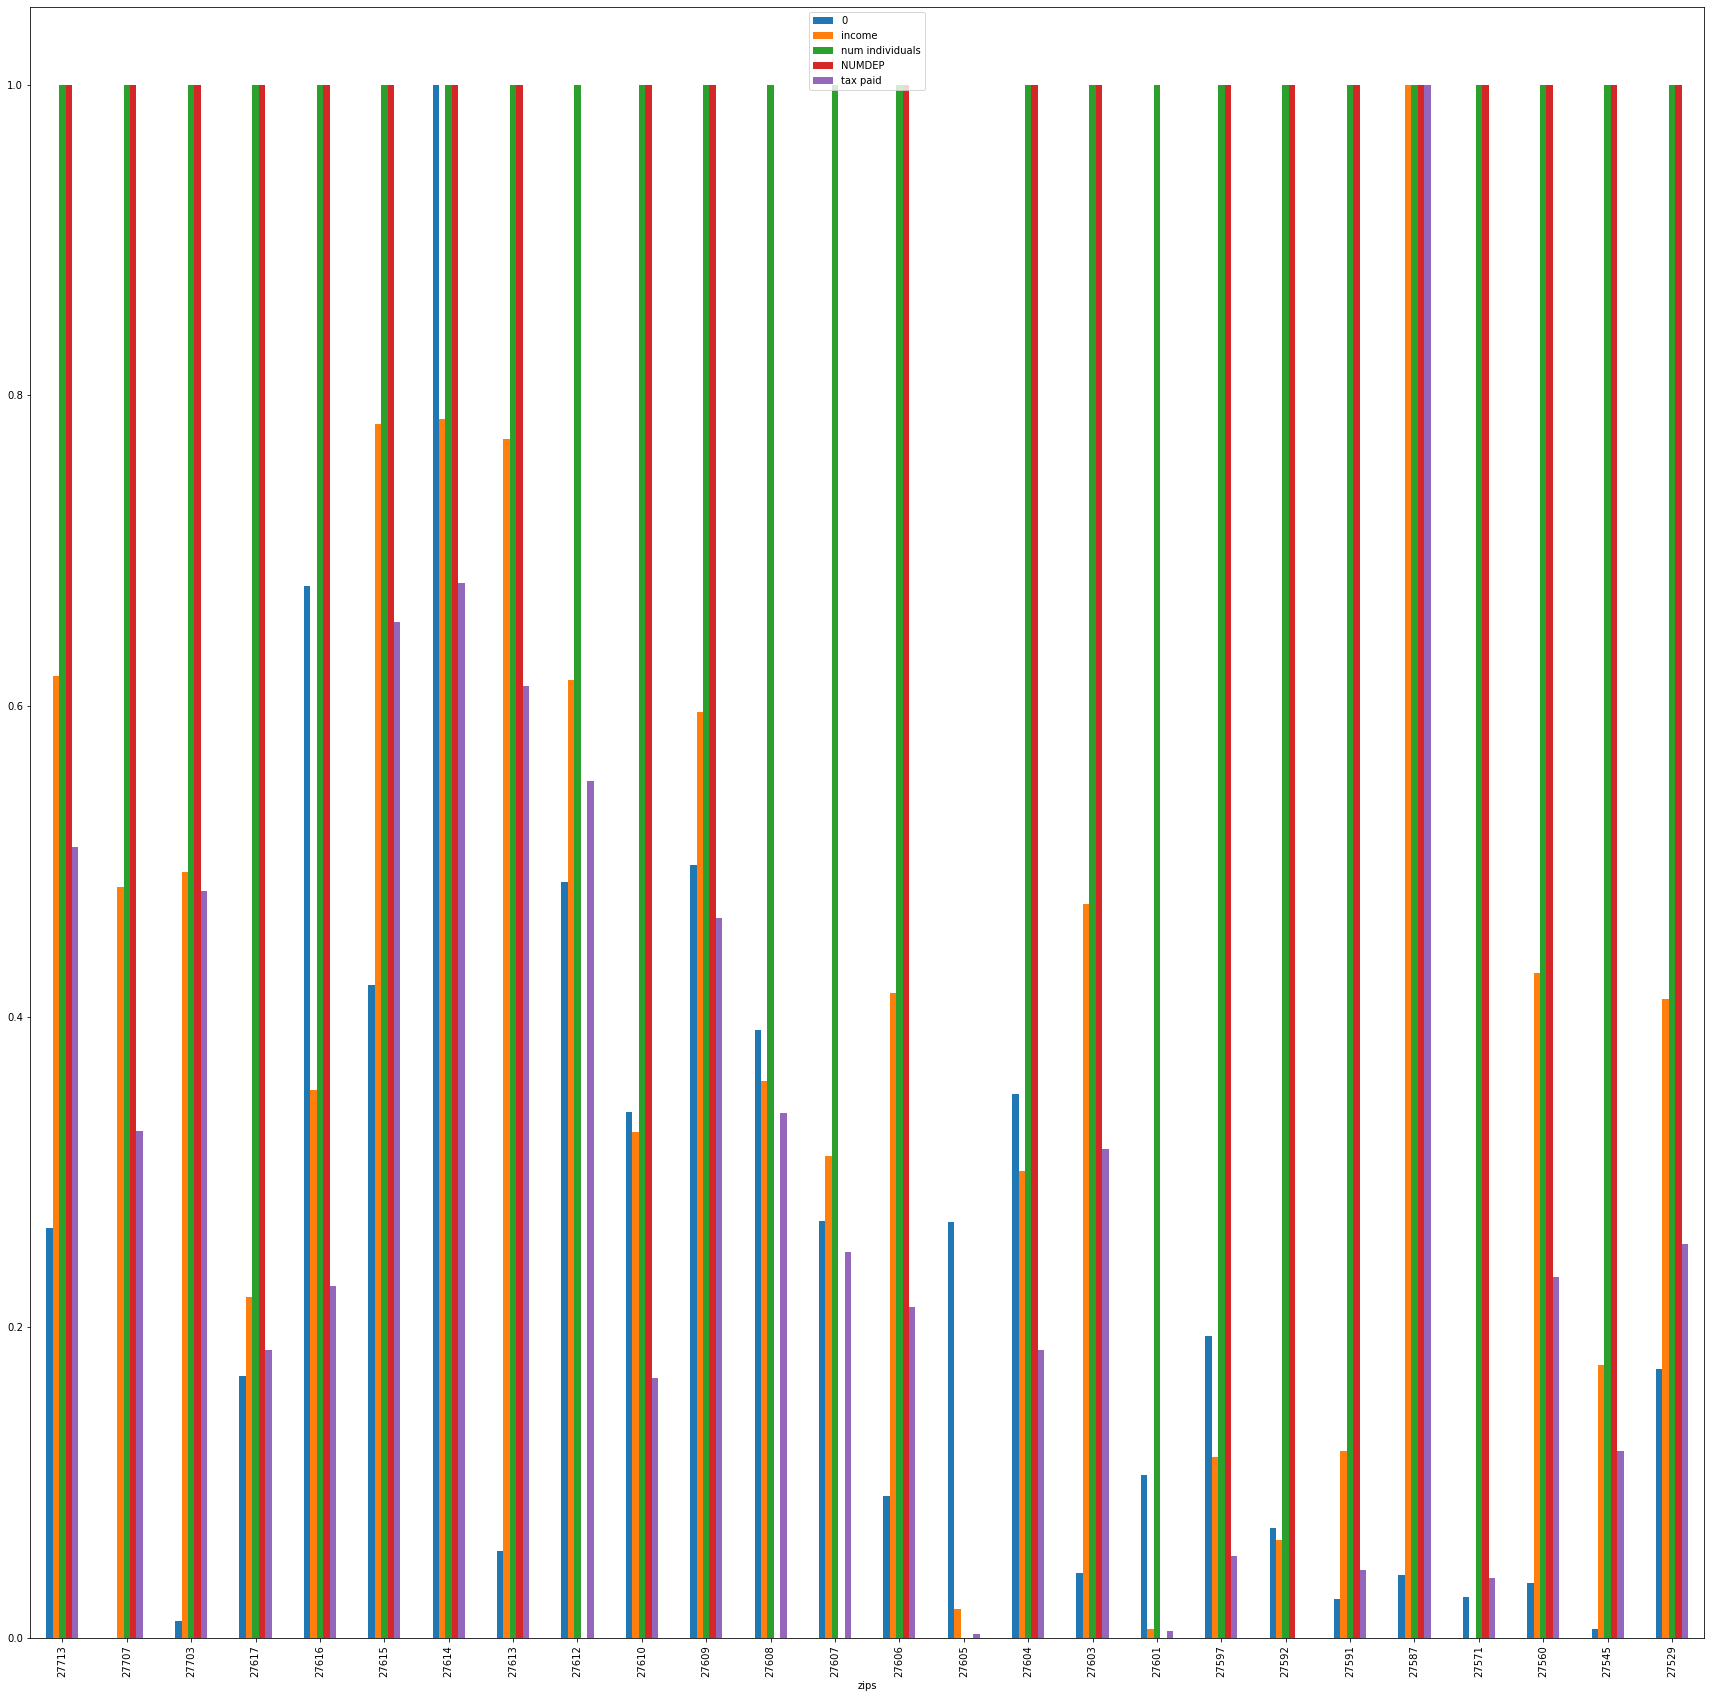

In [107]:
overall_biggest_crime_zipcode_income_std.plot(kind="bar",figsize=(30,30))
#overall_biggest_crime_zipcode_income_std.plot()

In [108]:
#overall_biggest_crime_zipcode_income_std = overall_biggest_crime_zipcode_income_std.set_index(overall_biggest_crime_zipcode_income_std["zips"])
overall_biggest_crime_zipcode_income_std = overall_biggest_crime_zipcode_income_std.drop('num individuals', 1)
overall_biggest_crime_zipcode_income_std = overall_biggest_crime_zipcode_income_std.drop('NUMDEP', 1)
overall_biggest_crime_zipcode_income_std = overall_biggest_crime_zipcode_income_std.sort_values(by=[0], ascending=False)
overall_biggest_crime_zipcode_income_std

,0,income,tax paid
zips,,,
27614,1.000000,0.785053,0.678965
27616,0.677577,0.352818,0.226367
27609,0.497539,0.595902,0.463553
27612,0.486946,0.616525,0.551878
27615,0.420162,0.781810,0.654018
27608,0.391555,0.358668,0.337906
27604,0.350481,0.300844,0.185231
27610,0.338688,0.325504,0.167562
27607,0.268682,0.310458,0.248725


<AxesSubplot:xlabel='zips'>

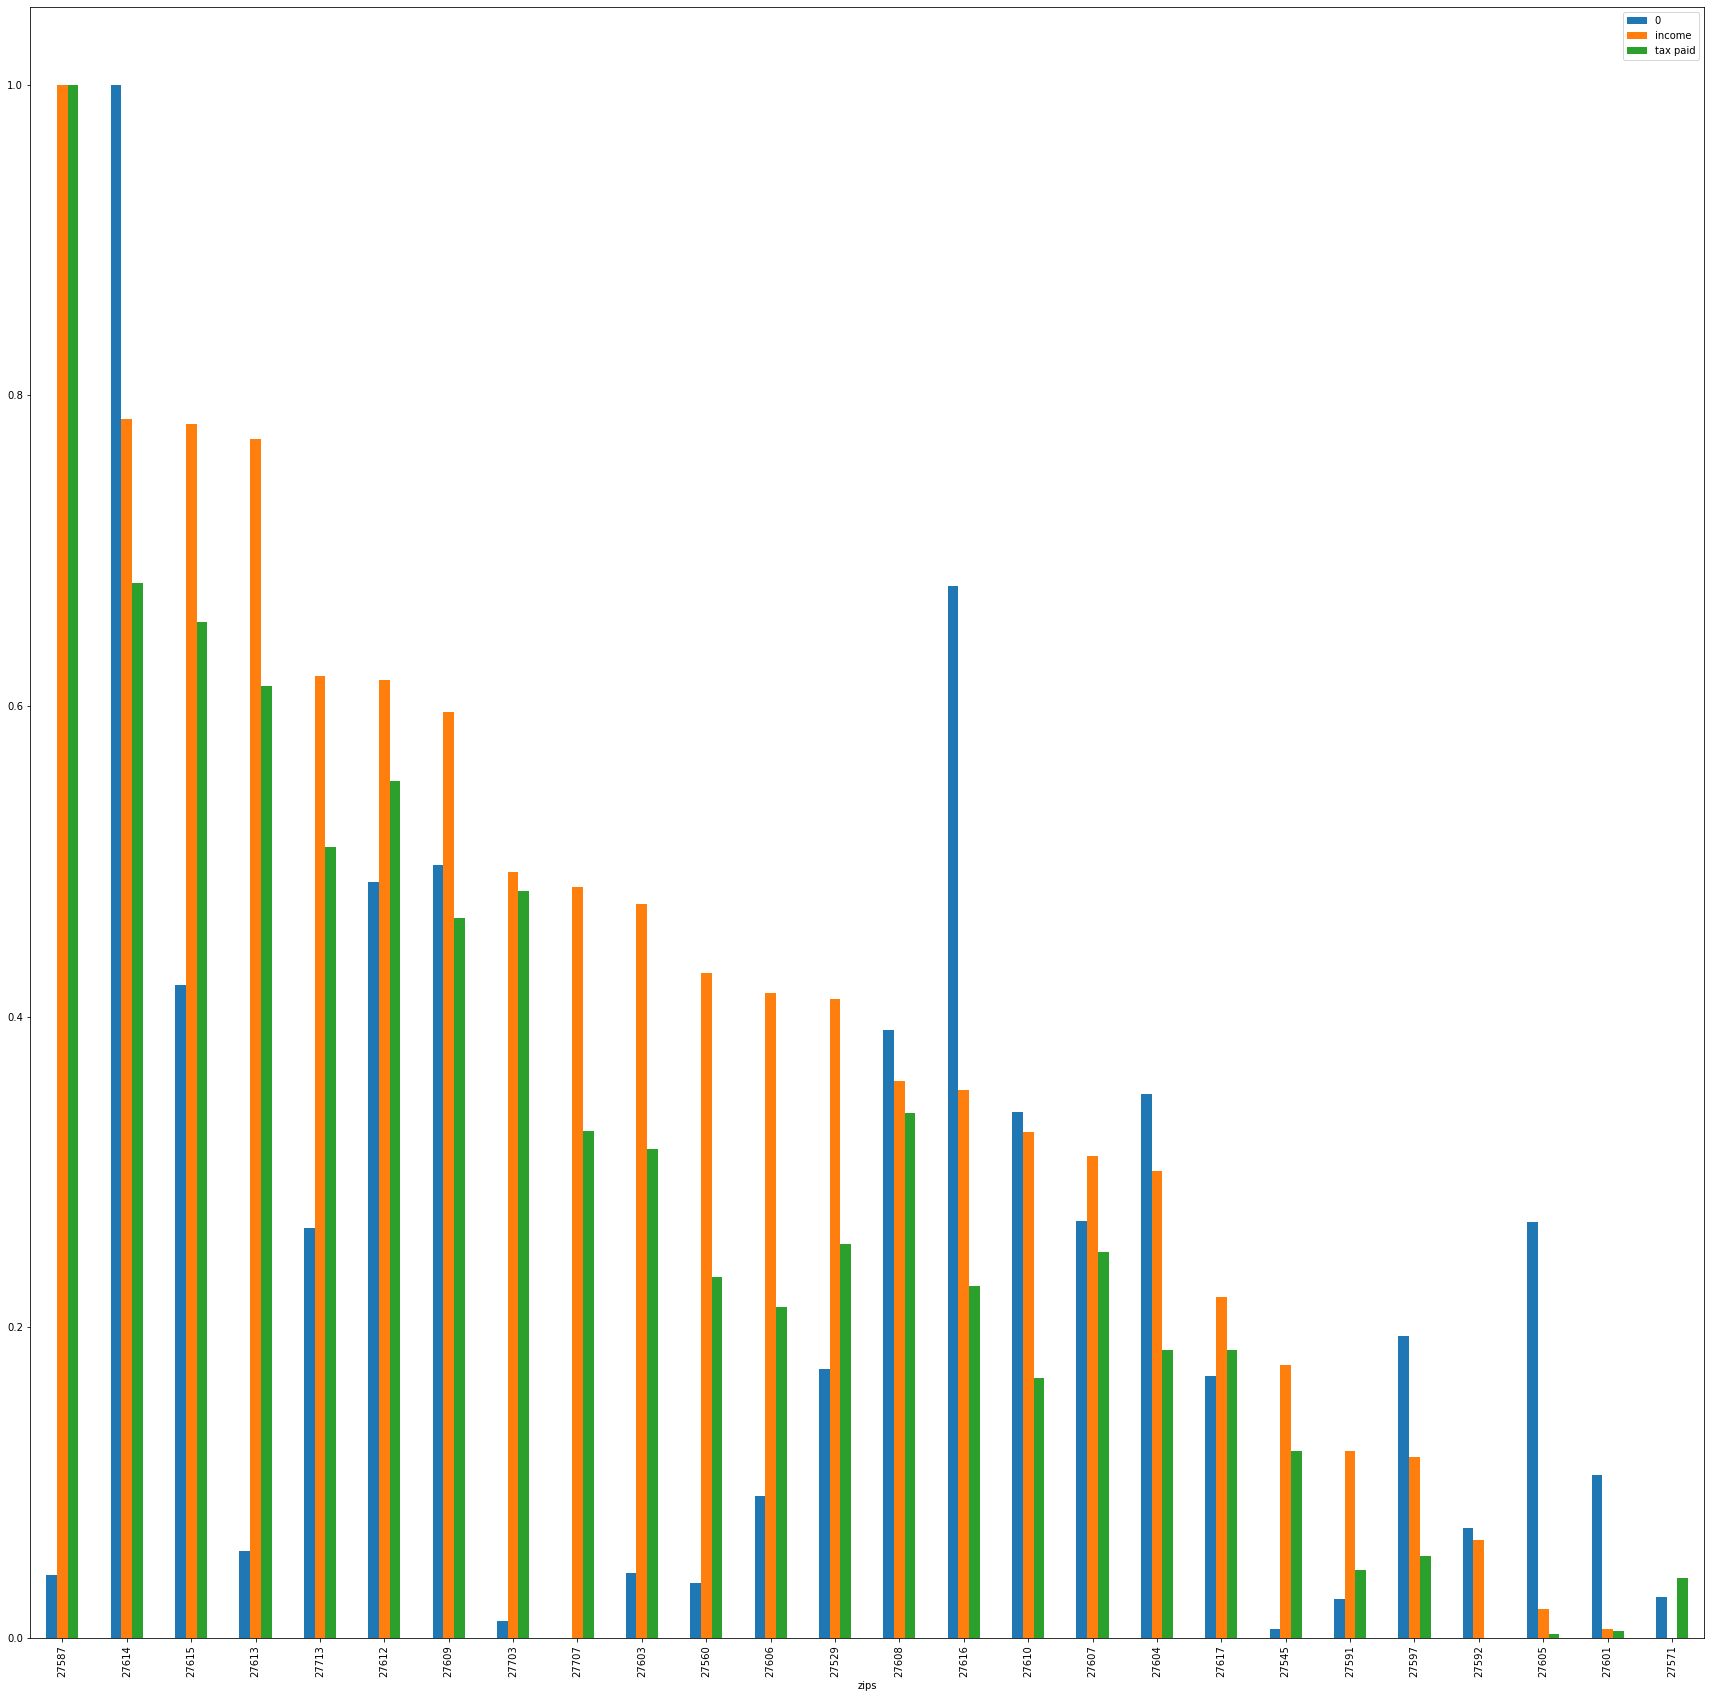

In [112]:
overall_biggest_crime_zipcode_income_std.plot(kind="bar",figsize=(30,30))
#overall_biggest_crime_zipcode_income_std.plot()

In [110]:
overall_biggest_crime_zipcode_income_std = overall_biggest_crime_zipcode_income_std.sort_values(by=['income'], ascending=False)

<AxesSubplot:xlabel='zips'>

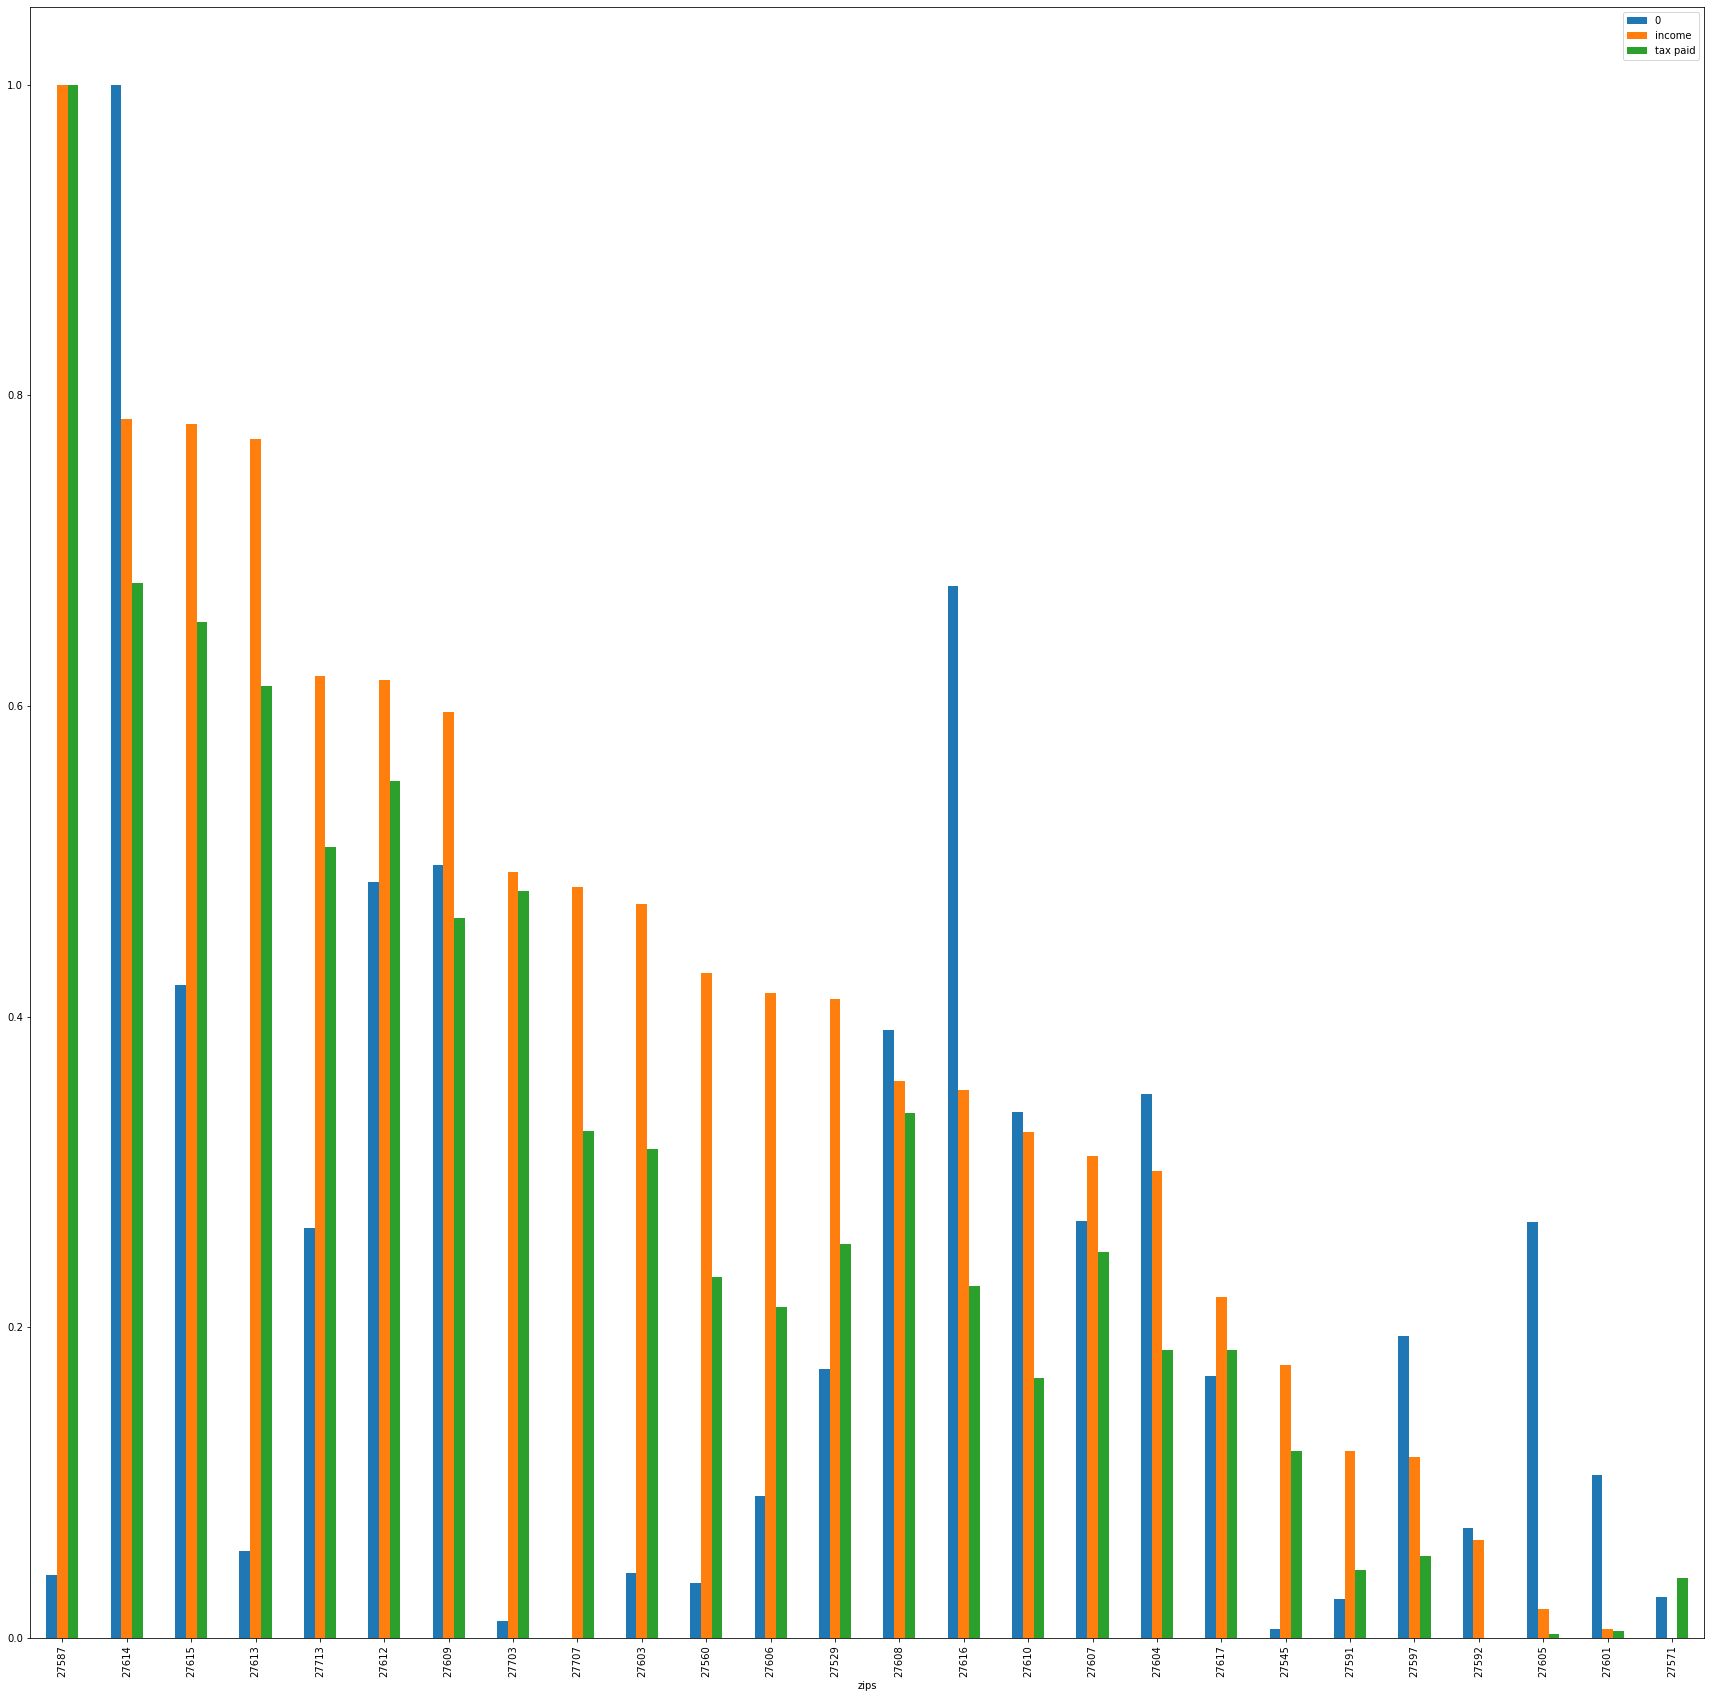

In [111]:
overall_biggest_crime_zipcode_income_std.plot(kind="bar",figsize=(30,30))
#overall_biggest_crime_zipcode_income_std.plot()